In [1]:
from process_edus import EDUSample

In [2]:
data = EDUSample()
path = r'../LabeledEDUS.txt'
dataset = []

for i in range(1, 6):
    X_train_vector, y_train, X_test_vector, y_test = \
                    data.split_vectorize(path, ngram=(1, i))
    dataset.append({
        'X_train': X_train_vector, 
        'y_train': y_train, 
        'X_test': X_test_vector, 
        'y_test': y_test
    })

=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 1)
                    X_train_vector shape: (1709, 432)
                    y_train shape: (1709,)
                    X_test_vector shape: (855, 432)
                    y_test shape: (855,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 2)
                    X_train_vector shape: (1709, 705)
                    y_train shape: (1709,)
                    X_test_vector shape: (855, 705)
                    y_test shape: (855,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 3)
                    X_train_vector shape: (1709, 763)
                    y_train shape: (1709,)
                    X_test_vector shape: (855, 763)
                    y_test shape: (855,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 4)
                    X_train_vector shape: (1709, 771)
                    y_train shape: (1709,)
                    X_test

In [3]:
data.nzp

(1322, 1577, 1242)

In [4]:
import numpy as np

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC

# Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Performance 
from sklearn.metrics import make_scorer, classification_report, confusion_matrix

# Visualiuzations
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

#### Support Vector Machines

In [15]:
# set up parameters

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gamma = ['auto', 'scale']

linear_params = ParameterGrid({
        'kernel': ['linear'],
        'C': C
})

poly_params = ParameterGrid({
        'kernel': ['poly'],
        'C': C,
        'degree': [2, 3, 4, 5, 6],
        'gamma': gamma
})
    
rbf_params = ParameterGrid({
        'kernel': ['rbf'],
        'C': C,
        'gamma': gamma
})
    
sig_params = ParameterGrid({
        'kernel': ['sigmoid'],
        'C': C,
        'gamma': gamma
})

In [16]:
best_models = []


gs = GridSearchCV(svc, param_grid=[], verbose=1)

In [18]:
gs.set_params(param_grid=list(linear_params))
gs.get_params()

{'cv': 'warn',
 'error_score': 'raise-deprecating',
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'auto_deprecated',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': 42,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': True,
 'estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
   kernel='rbf', max_iter=-1, probability=False, random_state=42,
   shrinking=True, tol=0.001, verbose=True),
 'fit_params': None,
 'iid': 'warn',
 'n_jobs': None,
 'param_grid': [{'C': 0.0001, 'kernel': 'linear'},
  {'C': 0.001, 'kernel': 'linear'},
  {'C': 0.01, 'kernel': 'linear'},
  {'C': 0.1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 

In [19]:
list(linear_params)

[{'C': 0.0001, 'kernel': 'linear'},
 {'C': 0.001, 'kernel': 'linear'},
 {'C': 0.01, 'kernel': 'linear'},
 {'C': 0.1, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'linear'},
 {'C': 10, 'kernel': 'linear'},
 {'C': 100, 'kernel': 'linear'}]

linear kernel 

In [41]:
svc = SVC(random_state=42, verbose=True)

lin_results = []
for ngram in range(5):
    c_data = dataset[ngram] 
    X_train, y_train, X_test, y_test = \
        c_data['X_train'], c_data['y_train'], c_data['X_test'], c_data['y_test']
    
    max_score = 0
    lin_results.append({})
    
    for param in list(linear_params):
        svc.set_params(C=param['C'], kernel=param['kernel'])
        svc.fit(X_train, y_train)
        
        s = svc.score(X_test, y_test)
        
        print(param, 'score = {}'.format(s))
        
        if (s > max_score):
            max_score = s
            lin_results[-1]['score'] = s
            lin_results[-1]['params'] = param
    

[LibSVM]{'C': 0.0001, 'kernel': 'linear'} score = 0.5286549707602339
[LibSVM]{'C': 0.001, 'kernel': 'linear'} score = 0.5274853801169591
[LibSVM]{'C': 0.01, 'kernel': 'linear'} score = 0.6538011695906433
[LibSVM]{'C': 0.1, 'kernel': 'linear'} score = 0.7953216374269005
[LibSVM]{'C': 1, 'kernel': 'linear'} score = 0.7883040935672515
[LibSVM]{'C': 10, 'kernel': 'linear'} score = 0.7461988304093568
[LibSVM]{'C': 100, 'kernel': 'linear'} score = 0.7391812865497076
[LibSVM]{'C': 0.0001, 'kernel': 'linear'} score = 0.5286549707602339
[LibSVM]{'C': 0.001, 'kernel': 'linear'} score = 0.5274853801169591
[LibSVM]{'C': 0.01, 'kernel': 'linear'} score = 0.6596491228070176
[LibSVM]{'C': 0.1, 'kernel': 'linear'} score = 0.7953216374269005
[LibSVM]{'C': 1, 'kernel': 'linear'} score = 0.7707602339181286
[LibSVM]{'C': 10, 'kernel': 'linear'} score = 0.7228070175438597
[LibSVM]{'C': 100, 'kernel': 'linear'} score = 0.7017543859649122
[LibSVM]{'C': 0.0001, 'kernel': 'linear'} score = 0.5286549707602339
[

In [42]:
lin_results

[{'score': 0.7953216374269005, 'params': {'C': 0.1, 'kernel': 'linear'}},
 {'score': 0.7953216374269005, 'params': {'C': 0.1, 'kernel': 'linear'}},
 {'score': 0.791812865497076, 'params': {'C': 0.1, 'kernel': 'linear'}},
 {'score': 0.7953216374269005, 'params': {'C': 0.1, 'kernel': 'linear'}},
 {'score': 0.7953216374269005, 'params': {'C': 0.1, 'kernel': 'linear'}}]

polynomial kernel

In [39]:
svc = SVC(random_state=42, verbose=True)

poly_results = []
for ngram in range(5):
    c_data = dataset[ngram] 
    X_train, y_train, X_test, y_test = \
        c_data['X_train'], c_data['y_train'], c_data['X_test'], c_data['y_test']
    
    max_score = 0
    poly_results.append({})
    
    for param in list(poly_params):
        svc.set_params(C=param['C'], kernel=param['kernel'], degree=param['degree'], gamma=param['gamma'])
        svc.fit(X_train, y_train)
        
        s = svc.score(X_test, y_test)
        
        print(param, 'score = {}'.format(s))
        
        if (s > max_score):
            max_score = s
            poly_results[-1]['score'] = s
            poly_results[-1]['params'] = param

[LibSVM]{'C': 0.0001, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'} score = 0.5286549707602339
[LibSVM]{'C': 0.0001, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'} score = 0.5286549707602339
[LibSVM]{'C': 0.0001, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'} score = 0.5286549707602339
[LibSVM]{'C': 0.0001, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'} score = 0.5286549707602339
[LibSVM]{'C': 0.0001, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'} score = 0.5286549707602339
[LibSVM]{'C': 0.0001, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'} score = 0.5286549707602339
[LibSVM]{'C': 0.0001, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'} score = 0.5286549707602339
[LibSVM]{'C': 0.0001, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'} score = 0.5286549707602339
[LibSVM]{'C': 0.0001, 'degree': 6, 'gamma': 'auto', 'kernel': 'poly'} score = 0.5286549707602339
[LibSVM]{'C': 0.0001, 'degree': 6, 'gamma': 'scale', 'kernel': 'poly'} score = 0.5286549707602339
[LibSVM]{'C': 0.001, 'deg

In [40]:
poly_results

[{'score': 0.752046783625731,
  'params': {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}},
 {'score': 0.7415204678362574,
  'params': {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}},
 {'score': 0.7239766081871345,
  'params': {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}},
 {'score': 0.7228070175438597,
  'params': {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}},
 {'score': 0.7228070175438597,
  'params': {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}}]

rbf kernel

In [43]:
svc = SVC(random_state=42, verbose=True)

rbf_results = []
for ngram in range(5):
    c_data = dataset[ngram] 
    X_train, y_train, X_test, y_test = \
        c_data['X_train'], c_data['y_train'], c_data['X_test'], c_data['y_test']
    
    max_score = 0
    rbf_results.append({})
    
    for param in list(rbf_params):
        svc.set_params(C=param['C'], kernel=param['kernel'], gamma=param['gamma'])
        svc.fit(X_train, y_train)
        
        s = svc.score(X_test, y_test)
        
        print(param, 'score = {}'.format(s))
        
        if (s > max_score):
            max_score = s
            rbf_results[-1]['score'] = s
            rbf_results[-1]['params'] = param

[LibSVM]{'C': 0.0001, 'gamma': 'auto', 'kernel': 'rbf'} score = 0.5286549707602339
[LibSVM]{'C': 0.0001, 'gamma': 'scale', 'kernel': 'rbf'} score = 0.5286549707602339
[LibSVM]{'C': 0.001, 'gamma': 'auto', 'kernel': 'rbf'} score = 0.5286549707602339
[LibSVM]{'C': 0.001, 'gamma': 'scale', 'kernel': 'rbf'} score = 0.5286549707602339
[LibSVM]{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} score = 0.5286549707602339
[LibSVM]{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'} score = 0.5286549707602339
[LibSVM]{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} score = 0.5286549707602339
[LibSVM]{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'} score = 0.5309941520467836
[LibSVM]{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'} score = 0.5824561403508772
[LibSVM]{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'} score = 0.7380116959064328
[LibSVM]{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'} score = 0.7719298245614035
[LibSVM]{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} score = 0.8105263157894737
[LibSVM]{'C': 100, 'gamma': 

In [45]:
rbf_results

[{'score': 0.8105263157894737,
  'params': {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}},
 {'score': 0.8011695906432749,
  'params': {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}},
 {'score': 0.8, 'params': {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}},
 {'score': 0.8023391812865497,
  'params': {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}},
 {'score': 0.8023391812865497,
  'params': {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}}]

sigmoid kernel

In [46]:
svc = SVC(random_state=42, verbose=True)

sig_results = []
for ngram in range(5):
    c_data = dataset[ngram] 
    X_train, y_train, X_test, y_test = \
        c_data['X_train'], c_data['y_train'], c_data['X_test'], c_data['y_test']
    
    max_score = 0
    sig_results.append({})
    
    for param in list(sig_params):
        svc.set_params(C=param['C'], kernel=param['kernel'], gamma=param['gamma'])
        svc.fit(X_train, y_train)
        
        s = svc.score(X_test, y_test)
        
        print(param, 'score = {}'.format(s))
        
        if (s > max_score):
            max_score = s
            sig_results[-1]['score'] = s
            sig_results[-1]['params'] = param

[LibSVM]{'C': 0.0001, 'gamma': 'auto', 'kernel': 'sigmoid'} score = 0.5286549707602339
[LibSVM]{'C': 0.0001, 'gamma': 'scale', 'kernel': 'sigmoid'} score = 0.5286549707602339
[LibSVM]{'C': 0.001, 'gamma': 'auto', 'kernel': 'sigmoid'} score = 0.5286549707602339
[LibSVM]{'C': 0.001, 'gamma': 'scale', 'kernel': 'sigmoid'} score = 0.5286549707602339
[LibSVM]{'C': 0.01, 'gamma': 'auto', 'kernel': 'sigmoid'} score = 0.5286549707602339
[LibSVM]{'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'} score = 0.5286549707602339
[LibSVM]{'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'} score = 0.5286549707602339
[LibSVM]{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'} score = 0.5274853801169591
[LibSVM]{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'} score = 0.5298245614035088
[LibSVM]{'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'} score = 0.6888888888888889
[LibSVM]{'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'} score = 0.7157894736842105
[LibSVM]{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'} score =

In [47]:
sig_results

[{'score': 0.7894736842105263,
  'params': {'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}},
 {'score': 0.8011695906432749,
  'params': {'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}},
 {'score': 0.7941520467836257,
  'params': {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}},
 {'score': 0.7988304093567251,
  'params': {'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}},
 {'score': 0.7988304093567251,
  'params': {'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid'}}]

plot all

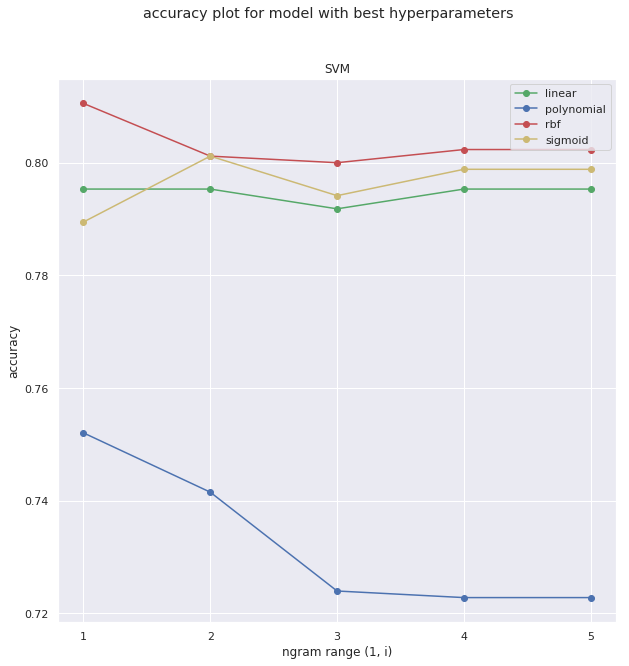

In [83]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('accuracy plot for model with best hyperparameters')
ax = plt.subplot(111)
ax.set_title('SVM')

x = list(range(1,6))

ax.plot(x, [d['score'] for d in lin_results], 'go-', label='linear')
ax.plot(x, [d['score'] for d in poly_results], 'bo-', label='polynomial')
ax.plot(x, [d['score'] for d in rbf_results], 'ro-', label='rbf')
ax.plot(x, [d['score'] for d in sig_results], 'yo-', label='sigmoid')

ax.legend()

plt.xlabel('ngram range (1, i)')
plt.xticks(np.arange(1,6))
plt.ylabel('accuracy')
plt.show()

fig.savefig('svm_accuracy_plot.png')

In [9]:
# get training accuracy

svc = SVC(random_state=42, verbose=True)
c_data = dataset[0] 
X_train, y_train, X_test, y_test = \
        c_data['X_train'], c_data['y_train'], c_data['X_test'], c_data['y_test']

param = {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


svc.set_params(C=param['C'], kernel=param['kernel'], gamma=param['gamma'])
svc.fit(X_train, y_train)
        
svc.score(X_train, y_train), svc.score(X_test, y_test)

[LibSVM]

(0.9163253364540667, 0.8105263157894737)